### 讀取數據

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
raw = pd.read_csv('/content/drive/MyDrive/colabData/weather_daily.csv')
print(raw.tail(3))
print(raw.shape)
print(raw.columns)

Mounted at /content/drive
      Unnamed: 0    T (degC)     p (mbar)  VPmax (mbar)  VPdef (mbar)  \
2917        2917  276.860833  1014.572222      7.985069      0.837153   
2918        2918  272.562917  1012.360278      5.998264      0.473472   
2919        2919  270.619653  1007.879167      5.187431      0.754167   

      sh (g/kg)  rho (g/m**3)        wv  
2917   4.394097   1273.158750  1.533681  
2918   3.400556   1291.345347  1.151042  
2919   2.740139   1295.362917  0.894653  
(2920, 8)
Index(['Unnamed: 0', 'T (degC)', 'p (mbar)', 'VPmax (mbar)', 'VPdef (mbar)',
       'sh (g/kg)', 'rho (g/m**3)', 'wv'],
      dtype='object')


### 標準化

302.625625
256.6274305555555


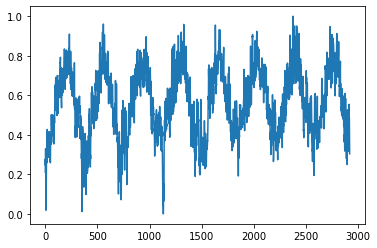

In [ ]:
import numpy as np

temp_max = np.max(raw["T (degC)"])
temp_min = np.min(raw["T (degC)"])

print(temp_max)
print(temp_min)

nor_temp = (raw["T (degC)"] - temp_min) / (temp_max-temp_min)

import matplotlib.pyplot as plt
plt.plot(nor_temp)
plt.show()

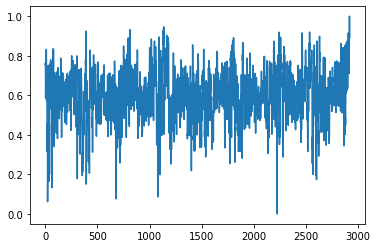

In [ ]:
nor_pre = (raw["p (mbar)"] - np.min(raw["p (mbar)"])) / (np.max(raw["p (mbar)"])-np.min(raw["p (mbar)"]))
plt.plot(nor_pre)
plt.show()

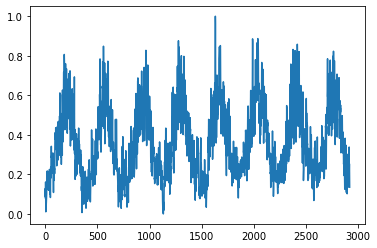

In [ ]:
nor_sh = (raw["sh (g/kg)"] - np.min(raw["sh (g/kg)"])) / (np.max(raw["sh (g/kg)"])-np.min(raw["sh (g/kg)"]))
plt.plot(nor_sh)
plt.show()

### 將pandas 轉 Numpy array

In [ ]:
import numpy as np

# 做出第一個特徵的矩陣
x = np.array(nor_pre, dtype='float64')
x = x.reshape((x.shape[0],1))

# 做出第二個特徵的矩陣，暫存在tempArray，並與x_train合併
tempArray = np.array(nor_sh, dtype='float64')
tempArray = tempArray.reshape((tempArray.shape[0],1))
x = np.concatenate([x, tempArray], axis=1)

print(x[:5])

[[0.75556771 0.08993559]
 [0.76303058 0.12938426]
 [0.74502439 0.07899919]
 [0.58611187 0.16158241]
 [0.61838786 0.11009641]]


In [ ]:
y = np.array(nor_temp, dtype='float64')
y = y.reshape((y.shape[0],1))
print(y[:5])

[[0.21148022]
 [0.27812384]
 [0.24501717]
 [0.3293683 ]
 [0.25170372]]


### 產出測試集與訓練集

In [ ]:
from sklearn.model_selection import train_test_split

print(x.shape)
print(y.shape)
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.05)

print(x_test.shape)
print(y_test.shape)

(2920, 2)
(2920, 1)
(146, 2)
(146, 1)


### 建立模型

In [ ]:
import tensorflow as tf

"""
activation: https://keras.io/zh/activations/
"""
model = tf.keras.Sequential()
# input layer: 50個神經元, 激活函數使用relu, 輸入4維資料
model.add(tf.keras.layers.Dense(units=50,activation=tf.nn.relu,input_dim=2))
# hidden layer: 50個神經元, 激活函數使用relu
model.add(tf.keras.layers.Dense(units=50,activation=tf.nn.relu))
# output layer: 1個神經元(代表1個結果), 激活函數使用relu
model.add(tf.keras.layers.Dense(units=1, activation=tf.nn.relu))

"""
optimizaer: https://keras.io/zh/optimizers/
metrics: https://keras.io/zh/metrics/
loss: https://keras.io/zh/losses/
"""

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss = tf.keras.losses.mean_squared_error)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                150       
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,751
Trainable params: 2,751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=64)

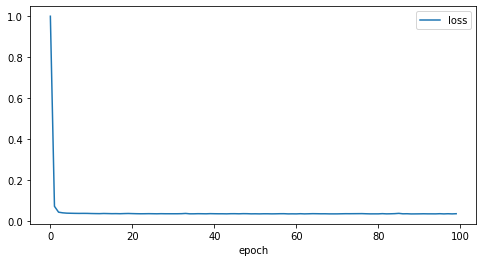

In [ ]:
loss = np.array(history.history['loss']) / history.history['loss'][0]

import matplotlib.pyplot as plt

plt.figure(figsize = (8,4))
plt.plot(loss, label="loss")
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
predict = model.predict(x_test)

In [ ]:
print("第一個測試資料:", x_test[0])
print("預測氣溫:",predict[0])

第一個測試資料: [0.69171788 0.27746954]
預測氣溫: [0.5082836]


In [ ]:
# inverse
inverse_Pred = predict * (temp_max-temp_min)+temp_min
inverse_Test = y_test * (temp_max-temp_min)+temp_min

In [ ]:
print("第一個測試資料:", x_test[0])
print("預測氣溫:",inverse_Pred[0])
print("真實氣溫:",inverse_Test[0])

第一個測試資料: [0.69171788 0.27746954]
預測氣溫: [280.00757]
真實氣溫: [281.35701389]
